In [1]:
from lab1.drafts.scripts import *
import importlib
import numpy as np
from lab1.Lab1_FK_answers import *
from lab1.task2_inverse_kinematics import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
bvh = "..\\data\\walk60.bvh"
joint_name, joint_parent, joint_offset = part1_calculate_T_pose(bvh)
motion_data = load_motion_data(bvh)
joint_positions, joint_orientations = part2_forward_kinematics(joint_name, joint_parent, joint_offset, motion_data, 0)

target = np.array([3., 1., 1.])

meta_data = MetaData(joint_name, joint_parent, joint_positions, 'RootJoint', 'lWrist_end')
path = meta_data.get_path_from_root_to_end()[0]

In [3]:
print(joint_name)
print(path)
print(joint_parent)

['RootJoint', 'lHip', 'lKnee', 'lAnkle', 'lToeJoint', 'lToeJoint_end', 'pelvis_lowerback', 'lowerback_torso', 'lTorso_Clavicle', 'lShoulder', 'lElbow', 'lWrist', 'lWrist_end', 'rTorso_Clavicle', 'rShoulder', 'rElbow', 'rWrist', 'rWrist_end', 'torso_head', 'torso_head_end', 'rHip', 'rKnee', 'rAnkle', 'rToeJoint', 'rToeJoint_end']
[0, 6, 7, 8, 9, 10, 11, 12]
[-1, 0, 1, 2, 3, 4, 0, 6, 7, 8, 9, 10, 11, 7, 13, 14, 15, 16, 7, 18, 0, 20, 21, 22, 23]


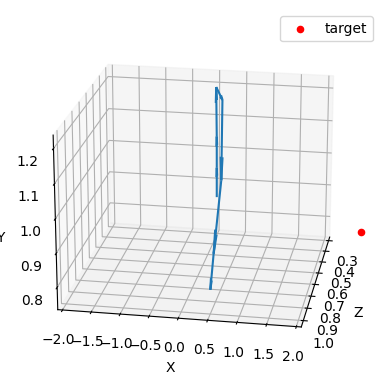

In [4]:
# left_leg = [0, 1, 2, 3, 4, 5]
# right_leg = [0, 20, 21, 22, 23, 24]
# torso = [0, 6, 7 , 8]
# left_arm = [9, 10, 11, 12]
# right_arm = [14, 15, 16, 17]
# 
# plot_manipulator(joint_positions,
#                    joint_parent,
#                    path,
#                    target, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

offsets = joint_positions - joint_positions[joint_parent]
offsets[0].fill(0)

ax.quiver(joint_positions[joint_parent][path, 0],
          joint_positions[joint_parent][path, 1],
          joint_positions[joint_parent][path, 2],
          offsets[path, 0],
          offsets[path, 1],
          offsets[path, 2])

ax.scatter(target[0], target[1], target[2], c='r', marker='o', label='target')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(-2, 2)
ax.set_xlim(-2, 2)
ax.set_xlim(-2, 2)
ax.legend()
ax.view_init(elev=20, azim=10, vertical_axis='y')

In [5]:
test_positions = joint_positions
test_orientations = joint_orientations

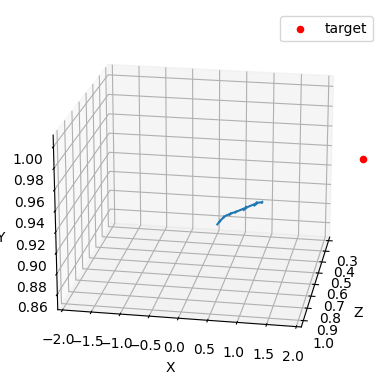

In [23]:
test_positions, test_orientations = gradient_descent(test_positions, 
                                                       test_orientations, 
                                                       joint_parent, 
                                                       joint_offset, 
                                                       joint_positions[0], 
                                                       path, target, learning_rate=1)

plot_manipulator(test_positions,
                   joint_parent,
                   path,
                   target, xlim=(-2, 2), ylim=(-2, 2), zlim=(-2, 2))
# print(f"Positions:\n{test_positions}\n"
#       f"Orientations:\n{test_orientations}")

In [24]:
joint_positions[0], test_positions[0]

(array([-0.001735,  0.855388,  0.315499]),
 array([-0.001735,  0.855388,  0.315499]))

In [93]:
np.linalg.norm(joint_positions - joint_positions[joint_parent], axis=1)

array([0.91544997, 0.11243419, 0.41      , 0.39      , 0.13928388,
       0.0608605 , 0.093605  , 0.1       , 0.15750317, 0.117647  ,
       0.245     , 0.24      , 0.11637985, 0.15750317, 0.117647  ,
       0.245     , 0.24      , 0.11637985, 0.28235   , 0.19265   ,
       0.11243419, 0.41      , 0.39      , 0.13928388, 0.0608605 ])

In [94]:
np.linalg.norm(test_positions - test_positions[joint_parent], axis=1)

array([0.81572081, 0.11243419, 0.41      , 0.39      , 0.13928388,
       0.0608605 , 0.093605  , 0.1       , 0.15750317, 0.117647  ,
       0.245     , 0.24      , 0.11637985, 0.15750317, 0.117647  ,
       0.245     , 0.24      , 0.11637985, 0.28235   , 0.19265   ,
       0.11243419, 0.41      , 0.39      , 0.13928388, 0.0608605 ])

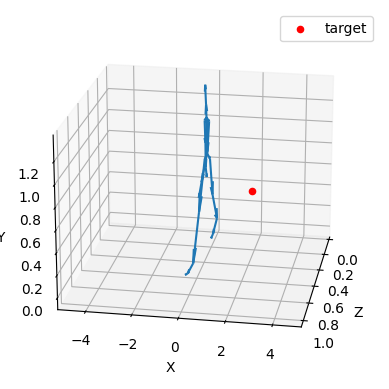

In [3]:
plot_manipulator(joint_positions,
                   joint_parent,
                   np.arange(joint_positions.shape[0]),
                   target, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))

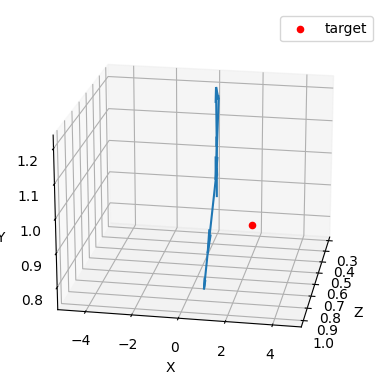

In [4]:
plot_manipulator(joint_positions,
                   joint_parent,
                   path,
                   target, xlim=(-5, 5), ylim=(-5, 5), zlim=(-5, 5))